# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import json

In [124]:
df_1 = pd.read_csv('twitter_archive_enhanced.csv')
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [125]:
import requests

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

image_url = requests.get(url, allow_redirects=True)

# To save the html to file
with open('image-predictions.tsv', mode='wb')as file:

    file.write(image_url.content)

In [126]:
# to read the tsv file into a pandas dataframe

df_2 = pd.read_csv('image-predictions.tsv',sep='\t')

# to catch a quick glimpse of the first 5 rows of the dataset
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [ ]:
# the following confidential data has been replaced by generic strings
consumer_key = 'CONSUMER_KEY'
consumer_secret = 'CONSUMER_SECRET'
access_token = 'ACCESS_TOKEN'
access_secret = 'ACCESS_SECRET'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [128]:
# To read the JSON file, line by line
df_list = []
with open ('tweet-json-copy.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        df_list.append(tweet)
# To create a pandas dataframe (df_3)
df_3 = pd.DataFrame(df_list)
df_3.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}}}]}","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145

## Assessing Data
In this section, I will detect and document at least **eight (8) quality issues and two (2) tidiness issue**. I must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** I must pay attention to the following key points when you access the data.

* I only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* I do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [129]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [130]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [131]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [132]:
all_columns = pd.Series(list(df_1) + list(df_2) + list(df_3))
all_columns[all_columns.duplicated()]

17    tweet_id             
37    source               
38    in_reply_to_status_id
40    in_reply_to_user_id  
dtype: object

In [133]:
list(df_3)

['created_at',
 'id',
 'id_str',
 'full_text',
 'truncated',
 'display_text_range',
 'entities',
 'extended_entities',
 'source',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'user',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'lang',
 'retweeted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status']

In [134]:
# remove retweets.. i.e records where retweeted_status_id is not null
df_1 = df_1[pd.isnull(df_1['retweeted_status_id'])]

In [135]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

In [136]:
df_1.query('rating_numerator > 20')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,None,None,None,None


### Quality issues

#### `Twitter Archive Enhanced Table (df_1)` Table
1. timestamp data type is string and remove +0000

2. rating_denominator column contains inaccurate data

3. rating_numenator column contains inaccurate data

4. Erroneous datatypes (tweet_id)

5. In the name column, None is used to respresent some dog name

6. Text in source column is not readable

7. Remove Retweets


#### `Image predictions (df_2)` Table

1. Dog name in P1, P2, and P3 is separated by underscore instead of space and start with lower case letters

2. Erroneous datatypes (tweet_id)

#### `df_3` Table

1. Erroneous datatypes (created_at, id)
2. Inaccurate column header

### Tidiness issues
1. Column header in df_1 (doggo, floofer, pupper, puppo) should be in the same cloumn
2. Column header in df_2(p1,p2,p3) should be in one column
3. Column header in df_2(p1_conf, p2_conf ,p3_conf)
4. The three tables should be combined into one.
5. There are duplicated columns and columns that wont be used in the analysis


## Cleaning Data
In this section, I clean **all** of the issues I documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [137]:
# Make copies of original pieces of data

df_1_clean = df_1.copy()
df_2_clean = df_2.copy()
df_3_clean = df_3.copy()

## Twitter Archive Enhanced Table (df_1) Table

### Issue #1:

#### Define:

- Timestamp data type is string instead of date time and remove +0000

#### Code

In [138]:

#remove +0000
df_1_clean.timestamp = df_1_clean.timestamp.str[:-6]

# convert timestamp to datetime
df_1_clean.timestamp = pd.to_datetime(df_1_clean.timestamp)

#### Test

In [139]:
df_1_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [140]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2175 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2175 non-null   datetime64[ns]
 4   source                      2175 non-null   object        
 5   text                        2175 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2117 non-null   object        
 10  rating_numerator            2175 non-null   int64         
 11  rating_denominator          2175 non-null   int64       

### Issue #2: 

Rating_denominator	 column contains inaccurate data

#### Define
update the 	rating_denominator column with the ratings in text column

#### Code

In [141]:
# Display entire text
pd.set_option('display.max_colwidth', -1)

# Filter rating_denominator not equal to 10
df_1_clean.query('rating_denominator != 10')

C:\Users\HP\AppData\Local\Temp\ipykernel_9904\3128402648.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,No

In [142]:
df_1_clean.rating_denominator.value_counts()

10     2153
50     3   
11     2   
20     2   
80     2   
15     1   
70     1   
7      1   
150    1   
170    1   
0      1   
90     1   
40     1   
130    1   
110    1   
16     1   
120    1   
2      1   
Name: rating_denominator, dtype: int64

In [143]:
df_1_clean.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,No

In [144]:
# Correct ratings by reading through the text in text column.
# for tweet_id: 835246439529840640
df_1_clean.loc[df_1_clean.tweet_id == 835246439529840640, 'rating_numerator'] = 13
df_1_clean.loc[df_1_clean.tweet_id == 835246439529840640, 'rating_denominator'] = 10
# for tweet_id: 820690176645140481 - More than one ratings
df_1_clean.loc[df_1_clean.tweet_id == 820690176645140481, 'rating_numerator'] = 12
df_1_clean.loc[df_1_clean.tweet_id == 820690176645140481, 'rating_denominator'] = 10
# for tweet_id: 810984652412424192 - There is no ratings here
df_1_clean.loc[df_1_clean.tweet_id == 810984652412424192, 'rating_numerator'] = 10
df_1_clean.loc[df_1_clean.tweet_id == 810984652412424192, 'rating_denominator'] = 10
# for tweet_id: 775096608509886464
df_1_clean.loc[df_1_clean.tweet_id == 775096608509886464, 'rating_numerator'] = 14
df_1_clean.loc[df_1_clean.tweet_id == 775096608509886464, 'rating_denominator'] = 10
# for tweet_id: 758467244762497024 - More than one ratings
df_1_clean.loc[df_1_clean.tweet_id == 758467244762497024, 'rating_numerator'] = 11
df_1_clean.loc[df_1_clean.tweet_id == 758467244762497024, 'rating_denominator'] = 10
# for tweet_id: 740373189193256964 
df_1_clean.loc[df_1_clean.tweet_id == 740373189193256964, 'rating_numerator'] = 14
df_1_clean.loc[df_1_clean.tweet_id == 740373189193256964, 'rating_denominator'] = 10
# for tweet_id: 731156023742988288 - More than one rating
df_1_clean.loc[df_1_clean.tweet_id == 731156023742988288, 'rating_numerator'] = 12
df_1_clean.loc[df_1_clean.tweet_id == 731156023742988288, 'rating_denominator'] = 10
# for tweet_id: 722974582966214656  
df_1_clean.loc[df_1_clean.tweet_id == 722974582966214656, 'rating_numerator'] = 13
df_1_clean.loc[df_1_clean.tweet_id == 722974582966214656, 'rating_denominator'] = 10
# for tweet_id: 716439118184652801
df_1_clean.loc[df_1_clean.tweet_id == 716439118184652801, 'rating_numerator'] = 11
df_1_clean.loc[df_1_clean.tweet_id == 716439118184652801, 'rating_denominator'] = 10
# for tweet_id: 713900603437621249 - More than one rating
df_1_clean.loc[df_1_clean.tweet_id == 713900603437621249, 'rating_numerator'] = 11
df_1_clean.loc[df_1_clean.tweet_id == 713900603437621249, 'rating_denominator'] = 10
# for tweet_id: 710658690886586372 - More than one rating
df_1_clean.loc[df_1_clean.tweet_id == 710658690886586372, 'rating_numerator'] = 10
df_1_clean.loc[df_1_clean.tweet_id == 710658690886586372, 'rating_denominator'] = 10
# for tweet_id: 709198395643068416 - More than one rating
df_1_clean.loc[df_1_clean.tweet_id == 709198395643068416, 'rating_numerator'] = 9
df_1_clean.loc[df_1_clean.tweet_id == 709198395643068416, 'rating_denominator'] = 10
# for tweet_id: 704054845121142784  - More than one rating
df_1_clean.loc[df_1_clean.tweet_id == 704054845121142784, 'rating_numerator'] = 12
df_1_clean.loc[df_1_clean.tweet_id == 704054845121142784, 'rating_denominator'] = 10
# for tweet_id: 697463031882764288 - More than one rating
df_1_clean.loc[df_1_clean.tweet_id == 697463031882764288, 'rating_numerator'] = 11
df_1_clean.loc[df_1_clean.tweet_id == 697463031882764288, 'rating_denominator'] = 10
# tweet_id: 686035780142297088 - More than one rating
df_1_clean.loc[df_1_clean.tweet_id == 686035780142297088, 'rating_numerator'] = 2
df_1_clean.loc[df_1_clean.tweet_id == 686035780142297088, 'rating_denominator'] = 10
# for tweet_id: 684225744407494656 - More than one rating
df_1_clean.loc[df_1_clean.tweet_id == 684225744407494656, 'rating_numerator'] = 11
df_1_clean.loc[df_1_clean.tweet_id == 684225744407494656, 'rating_denominator'] = 10
# for tweet_id: 684222868335505415 - More than one rating
df_1_clean.loc[df_1_clean.tweet_id == 684222868335505415, 'rating_numerator'] = 11
df_1_clean.loc[df_1_clean.tweet_id == 684222868335505415, 'rating_denominator'] = 10
# for tweet_id: 682962037429899265
df_1_clean.loc[df_1_clean.tweet_id == 682962037429899265, 'rating_numerator'] = 10
df_1_clean.loc[df_1_clean.tweet_id == 682962037429899265, 'rating_denominator'] = 10
# for tweet_id: 677716515794329600 - More than one rating
df_1_clean.loc[df_1_clean.tweet_id == 677716515794329600, 'rating_numerator'] = 12
df_1_clean.loc[df_1_clean.tweet_id == 677716515794329600, 'rating_denominator'] = 10
# tweet_id: 675853064436391936 - More than one rating
df_1_clean.loc[df_1_clean.tweet_id == 675853064436391936, 'rating_numerator'] = 11
df_1_clean.loc[df_1_clean.tweet_id == 675853064436391936, 'rating_denominator'] = 10
# tweet_id: 682808988178739200 - no ratings
df_1_clean.loc[df_1_clean.tweet_id == 682808988178739200, 'rating_numerator'] = 10
df_1_clean.loc[df_1_clean.tweet_id == 682808988178739200, 'rating_denominator'] = 10
# tweet_id: 666287406224695296
df_1_clean.loc[df_1_clean.tweet_id == 666287406224695296, 'rating_numerator'] = 9
df_1_clean.loc[df_1_clean.tweet_id == 666287406224695296, 'rating_denominator'] = 10

#drop tweet_id 832088576586297345 because the account was created on the 15-Nov-2015

df_1_clean.drop(df_1_clean.index[(df_1_clean["tweet_id"] == 832088576586297345)],axis=0,inplace=True)

#### Test

In [145]:
df_1_clean.rating_denominator.value_counts()

10    2174
Name: rating_denominator, dtype: int64

### Issue #3:

rating_numenator column contains inaccurate data

#### Define
rating_numenator column contains inaccurate data

#### code

In [146]:
df_1_clean.rating_numerator.value_counts()

12      504
10      446
11      432
13      309
9       157
8       98 
7       53 
14      44 
5       36 
6       32 
3       19 
4       15 
2       10 
1       7  
0       2  
420     2  
27      1  
75      1  
15      1  
182     1  
666     1  
1776    1  
17      1  
26      1  
Name: rating_numerator, dtype: int64

In [147]:
# rating_numerator less than 10
df_1_clean.query('rating_numerator < 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111729840128/photo/1,6,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I was going to do 007/10, but the joke wasn't worth the &lt;10 rating",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781661882474196992/photo/1,5,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [148]:
# Correct ratings by reading through the text in text column.
# for tweet_id: 883482846933004288
df_1_clean.loc[df_1_clean.tweet_id == 883482846933004288, 'rating_numerator'] = 14

In [149]:
# rating_numerator (75,420,26,27)
df_1_clean.query('rating_numerator == 75 or rating_numerator == 26 or rating_numerator == 27')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None


In [150]:
# Correct ratings by reading through the text in text column.
# for tweet_id: 832215909146226688 9.75 appeared in the text column
df_1_clean.loc[df_1_clean.tweet_id == 832215909146226688, 'rating_numerator'] = 9.75

# for tweet_id: 786709082849828864 9.75 appeared in the text column
df_1_clean.loc[df_1_clean.tweet_id == 786709082849828864, 'rating_numerator'] = 9.75

# for tweet_id: 778027034220126208 11.27 appeared in the text column
df_1_clean.loc[df_1_clean.tweet_id == 778027034220126208, 'rating_numerator'] = 11.27

# for tweet_id: 680494726643068929 11.26 appeared in the text column
df_1_clean.loc[df_1_clean.tweet_id == 680494726643068929, 'rating_numerator'] = 11.26

#### Test

In [151]:
df_1_clean.rating_numerator.value_counts()

12.00      504
10.00      446
11.00      432
13.00      309
9.00       157
8.00       98 
7.00       53 
14.00      45 
5.00       35 
6.00       32 
3.00       19 
4.00       15 
2.00       10 
1.00       7  
0.00       2  
420.00     2  
666.00     1  
1776.00    1  
11.27      1  
17.00      1  
9.75       1  
15.00      1  
182.00     1  
11.26      1  
Name: rating_numerator, dtype: int64

### Issue #4:
- Erroneous datatypes (tweet_id)

#### Define

- Tweet_id datatype is int instead of str

#### code


In [152]:
#convert tweet_id to string data type
df_1_clean['tweet_id'] = df_1_clean['tweet_id'].astype(str)

#### Test

In [153]:
df_1_clean.tweet_id.head()

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: object

### Issue #5:

- In the name column, None is used to respresent some dog name

#### Define

- In the name column, replace none with NaN

#### Code

In [154]:
# in name column, replace all None with NaN values
df_1_clean.name.replace('None', np.nan, inplace=True)

#### Test

In [155]:
df_1_clean.name.value_counts()

a             55
Charlie       11
Lucy          11
Oliver        10
Cooper        10
              ..
Wishes        1 
Rose          1 
Theo          1 
Fido          1 
Christoper    1 
Name: name, Length: 955, dtype: int64

### Issue #6:

- Text in source column is not readable

#### Define
- In the source column extract the device through which the tweet emanated from

#### Code

In [156]:
# Extract the device through which the tweet emanated from 

df_1_clean.source = df_1_clean.source.replace({'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>' : 'Twitter for iPhone',
                                              '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>' : 'Make a Scene',
                                              '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>' : 'Twitter Web Client',
                                              '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>' : 'TweetDeck'})

In [157]:
df_1_clean.source.value_counts()

Twitter for iPhone    2041
Make a Scene          91  
Twitter Web Client    31  
TweetDeck             11  
Name: source, dtype: int64

### Issue #7:

- Some columns do not contain ratings they contain retweets

#### Define
- Remove retweets

#### Code

In [158]:
# consider only orignal tweets (no retweets) 
df_1 = df_1[df_1['retweeted_status_id'].isnull()]
# remove retweet related columns
df_1 = df_1.drop(['retweeted_status_id', 
                        'retweeted_status_user_id', 
                        'retweeted_status_timestamp'], 
                       axis=1)

#### Test

In [159]:
df_1.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

## Twitter API (df_2) Table

### Issue #1:
- Dog name in P1, P2, and P3 is separated by underscore instead of space and start with lower case letters

#### Define
- Change the column header to a better describeable words

#### code


In [160]:
#Capitalize all the names in p1, p2 and p3

df_2_clean.p1 = df_2_clean.p1.str.title()
df_2_clean.p2 = df_2_clean.p2.str.title()
df_2_clean.p3 = df_2_clean.p3.str.title()

#### Test

In [161]:
df_2_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #2: 
- Erroneous datatype (tweet_id)

#### Define
- The tweet_id column datatype is int intead of string

#### code

In [162]:
# convert tweet_id data type to string
df_2_clean['tweet_id'] = df_2_clean['tweet_id'].astype(str)

#### Test

In [163]:
df_2_clean.tweet_id.head()

0    666020888022790149
1    666029285002620928
2    666033412701032449
3    666044226329800704
4    666049248165822465
Name: tweet_id, dtype: object

## Image prediction (df_3) Table

### Issue #1:
- Erroneous datatypes (created_at, id) and remove +0000
- Inaccurate column header (id)

#### Define
- Convert the created_at column to datetime
- Change column header id to tweet_id

#### code

In [164]:
# Convert created_at to datetime
df_3_clean.created_at = pd.to_datetime(df_3_clean.created_at)

# Convert id to string
df_3_clean['id'] = df_3_clean['id'].astype(str)

In [165]:
# Change column header id to tweet_id
df_3_clean.rename(columns = {'id' : 'tweet_id'}, inplace = True)

#### Test

In [166]:
df_3_clean.created_at.head()

0   2017-08-01 16:23:56+00:00
1   2017-08-01 00:17:27+00:00
2   2017-07-31 00:18:03+00:00
3   2017-07-30 15:58:51+00:00
4   2017-07-29 16:00:24+00:00
Name: created_at, dtype: datetime64[ns, UTC]

In [167]:
df_3_clean.tweet_id.head()

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: object

In [168]:
df_3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   tweet_id                       2354 non-null   object             
 2   id_str                         2354 non-null   object             
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

### Tidiness issues

### Issue #1:
- Column header in df_1 (doggo, floofer, pupper, puppo) should be in the same column

#### Define #1:
- Melt (doggo, floofer, pupper, puppo) into a single column

#### Code

In [169]:
# Melt (doggo, floofer, pupper, puppo) into a single column
df_1_clean = pd.melt(df_1_clean, id_vars = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 
                                           'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 
                                           'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 
                                           'rating_denominator', 'name'], value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], var_name =['dog_stage_STACKED_UP'], value_name = 'dog_stage')
df_1_clean = df_1_clean.drop('dog_stage_STACKED_UP', axis = 1)

#### Test

In [170]:
df_1_clean.dog_stage.value_counts()

None       8340
pupper     234 
doggo      87  
puppo      25  
floofer    10  
Name: dog_stage, dtype: int64

In [171]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8696 entries, 0 to 8695
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    8696 non-null   object        
 1   in_reply_to_status_id       308 non-null    float64       
 2   in_reply_to_user_id         308 non-null    float64       
 3   timestamp                   8696 non-null   datetime64[ns]
 4   source                      8696 non-null   object        
 5   text                        8696 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               8468 non-null   object        
 10  rating_numerator            8696 non-null   float64       
 11  rating_denominator          8696 non-null   int64       

### Issue #2:


#### Define #1:
Column header in df_2(p1,p2,p3) should be in one column

In [172]:
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Code

In [173]:
# create 'prediction_number' and 'prediction' columns
df_2_clean = pd.melt(df_2_clean, id_vars = ['tweet_id', 'jpg_url', 'img_num', 'p1_conf', 'p1_dog','p2_conf', 'p2_dog', 'p3_conf', 'p3_dog'],
               var_name = 'prediction_number',
               value_name = 'prediction')

In [174]:
df_2_clean.head()

,tweet_id,jpg_url,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,prediction_number,prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,0.465074,True,0.156665,True,0.061428,True,p1,Welsh_Springer_Spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,0.506826,True,0.074192,True,0.072010,True,p1,Redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,0.596461,True,0.138584,True,0.116197,True,p1,German_Shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,0.408143,True,0.360687,True,0.222752,True,p1,Rhodesian_Ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,0.560311,True,0.243682,True,0.154629,True,p1,Miniature_Pinscher


In [175]:
df_2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6225 entries, 0 to 6224
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tweet_id           6225 non-null   object 
 1   jpg_url            6225 non-null   object 
 2   img_num            6225 non-null   int64  
 3   p1_conf            6225 non-null   float64
 4   p1_dog             6225 non-null   bool   
 5   p2_conf            6225 non-null   float64
 6   p2_dog             6225 non-null   bool   
 7   p3_conf            6225 non-null   float64
 8   p3_dog             6225 non-null   bool   
 9   prediction_number  6225 non-null   object 
 10  prediction         6225 non-null   object 
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 407.4+ KB


### Issue #4:
- The three tables should be combined into one.

#### Define
- Merge the df_1_clean, df_2_clean, and df_3_clean into a single table

#### Code

In [176]:
# merge df_1_clean and df_2_clean

twitter_archive = pd.merge(df_1_clean, df_2_clean, on = ['tweet_id'], how = 'left')

In [185]:
# twitter_archive and df_3_clean

twitter_archive_master = pd.merge(twitter_archive, df_3_clean, on = ['tweet_id'], how ='left')

#### Test

In [186]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24648 entries, 0 to 24647
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       24648 non-null  object             
 1   in_reply_to_status_id_x        492 non-null    float64            
 2   in_reply_to_user_id_x          492 non-null    float64            
 3   timestamp                      24648 non-null  datetime64[ns]     
 4   source_x                       24648 non-null  object             
 5   text                           24648 non-null  object             
 6   retweeted_status_id            0 non-null      float64            
 7   retweeted_status_user_id       0 non-null      float64            
 8   retweeted_status_timestamp     0 non-null      object             
 9   expanded_urls                  24420 non-null  object             
 10  rating_numerator      

In [187]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24648 entries, 0 to 24647
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       24648 non-null  object             
 1   in_reply_to_status_id_x        492 non-null    float64            
 2   in_reply_to_user_id_x          492 non-null    float64            
 3   timestamp                      24648 non-null  datetime64[ns]     
 4   source_x                       24648 non-null  object             
 5   text                           24648 non-null  object             
 6   retweeted_status_id            0 non-null      float64            
 7   retweeted_status_user_id       0 non-null      float64            
 8   retweeted_status_timestamp     0 non-null      object             
 9   expanded_urls                  24420 non-null  object             
 10  rating_numerator      

In [188]:
#CODE: print list of twitter_archive_master columns
print(list(twitter_archive_master))

#Delete columns
twitter_archive_master =twitter_archive_master.drop(['text', 'in_reply_to_user_id_x',
                                                      'retweeted_status_id', 'retweeted_status_user_id', 
                                                      'retweeted_status_timestamp', 'expanded_urls', 
                                                      'jpg_url', 'img_num', 'contributors', 'coordinates',
                                                      'created_at', 'display_text_range', 'entities', 'full_text', 'geo',
                                                      'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id_y',
                                                      'in_reply_to_status_id_str', 'in_reply_to_user_id_y',
                                                      'in_reply_to_user_id_str', 'is_quote_status', 'possibly_sensitive',
                                                      'possibly_sensitive_appealable', 'quoted_status', 'quoted_status_id',
                                                      'quoted_status_id_str', 'retweeted_status', 'source_y', 'truncated',
                                                      'user', 'extended_entities', 'in_reply_to_status_id_x', 'p1_conf', 'p1_dog',
                                                      'p2_conf', 'p2_dog', 'p3_conf', 'p3_dog', 'prediction_number',
                                                      'lang', 'place'], 1)

#TEST
list(twitter_archive_master)

['tweet_id', 'in_reply_to_status_id_x', 'in_reply_to_user_id_x', 'timestamp', 'source_x', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'dog_stage', 'jpg_url', 'img_num', 'p1_conf', 'p1_dog', 'p2_conf', 'p2_dog', 'p3_conf', 'p3_dog', 'prediction_number', 'prediction', 'created_at', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source_y', 'in_reply_to_status_id_y', 'in_reply_to_status_id_str', 'in_reply_to_user_id_y', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang', 'retweeted_status', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status']


C:\Users\HP\AppData\Local\Temp\ipykernel_9904\2845108389.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  twitter_archive_master =twitter_archive_master.drop(['text', 'in_reply_to_user_id_x',


['tweet_id',
 'timestamp',
 'source_x',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage',
 'prediction',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted']

In [189]:
twitter_archive_master.head()

,tweet_id,timestamp,source_x,rating_numerator,rating_denominator,name,dog_stage,prediction,retweet_count,favorite_count,favorited,retweeted
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,13.0,10,Phineas,None,Orange,8853,39467,False,False
1,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,13.0,10,Phineas,None,Bagel,8853,39467,False,False
2,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,13.0,10,Phineas,None,Banana,8853,39467,False,False
3,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,13.0,10,Tilly,None,Chihuahua,6514,33819,False,False
4,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,13.0,10,Tilly,None,Pekinese,6514,33819,False,False


In [190]:
df_dog_type_count = twitter_archive_master.groupby('name').count()
df_dog_type_count

,tweet_id,timestamp,source_x,rating_numerator,rating_denominator,dog_stage,prediction,retweet_count,favorite_count,favorited,retweeted
name,,,,,,,,,,,
Abby,24,24,24,24,24,24,24,24,24,24,24
Ace,12,12,12,12,12,12,12,12,12,12,12
Acro,12,12,12,12,12,12,12,12,12,12,12
Adele,12,12,12,12,12,12,12,12,12,12,12
Aiden,12,12,12,12,12,12,12,12,12,12,12
...,...,...,...,...,...,...,...,...,...,...,...
such,12,12,12,12,12,12,12,12,12,12,12
the,88,88,88,88,88,88,84,88,88,88,88
this,12,12,12,12,12,12,12,12,12,12,12


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [191]:
#Store the clean DataFrame in a CSV file
twitter_archive_master.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. Most common device used to tweet

2. Dog with highest and lowest number of ratings

3. Most common dog 

### Visualization
1. Is there Correlation between ratings and favourite counts
2. Trends of tweets by month
3. Trends of retweets by month
4. Trends of favourited tweets by month


#### Insight 1
- The most common phone used to tweet is Iphone

In [192]:
#most common device 
twitter_archive_master.source_x.value_counts()

Twitter for iPhone    23804
Make a Scene          364  
Twitter Web Client    348  
TweetDeck             132  
Name: source_x, dtype: int64

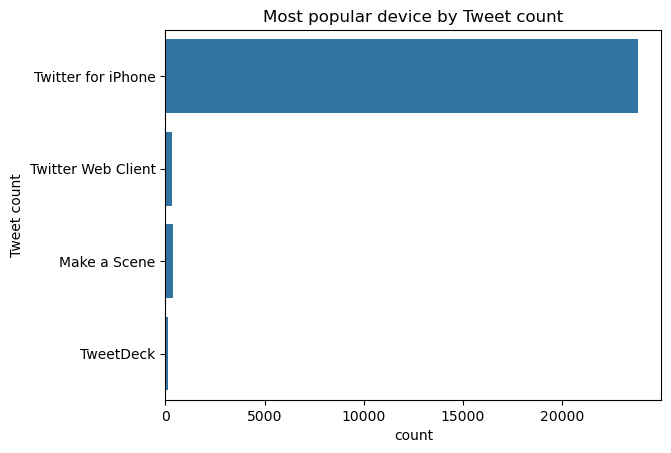

In [193]:
basecolor = sns.color_palette()[0]
sns.countplot(data = twitter_archive_master, y = 'source_x', color = basecolor)
plt.ylabel('Device used to Tweet')
plt.ylabel('Tweet count')
plt.title('Most popular device by Tweet count');

#### Insight 2
-  `Sunglass` has the highest ratings of 893/10
-  `Space_Shuttle	` has the lowest ratings of 0/10

In [194]:
twitter_archive_master_p1_average_ratings = twitter_archive_master.groupby('prediction').mean()
twitter_archive_master_p1_average_ratings.sort_values('rating_numerator', axis = 0, ascending = False,
                                                     inplace = True, na_position ='last')
twitter_archive_master_p1_average_ratings.head()

,rating_numerator,rating_denominator,retweet_count,favorite_count,favorited,retweeted
prediction,,,,,,
Sunglass,893.000000,10.0,2508.500000,5223.500000,0.0,0.0
Drumstick,420.000000,10.0,4324.000000,7989.000000,0.0,0.0
Accordion,420.000000,10.0,4324.000000,7989.000000,0.0,0.0
Microphone,420.000000,10.0,4324.000000,7989.000000,0.0,0.0
Bow_Tie,261.571429,10.0,2399.142857,6690.285714,0.0,0.0


In [195]:
twitter_archive_master_p1_average_ratings = twitter_archive_master.groupby('prediction').mean()
twitter_archive_master_p1_average_ratings.sort_values('rating_numerator', axis = 0, ascending = True,
                                                     inplace = True, na_position ='last')
twitter_archive_master_p1_average_ratings.head()

,rating_numerator,rating_denominator,retweet_count,favorite_count,favorited,retweeted
prediction,,,,,,
Space_Shuttle,0.0,10.0,336.0,3168.0,0.0,0.0
Partridge,1.0,10.0,6871.0,14765.0,0.0,0.0
Sulphur_Butterfly,1.0,10.0,431.0,872.0,0.0,0.0
Spotlight,1.0,10.0,2454.0,6138.0,0.0,0.0
Lacewing,1.0,10.0,431.0,872.0,0.0,0.0


#### Insight 3
- The most common dogs are  Golden_Retriever and Labrador_Retriever  

In [196]:
twitter_archive_master.prediction.value_counts().head()

Golden_Retriever      1068
Labrador_Retriever    1068
Chihuahua             716 
Pembroke              556 
Cardigan              452 
Name: prediction, dtype: int64

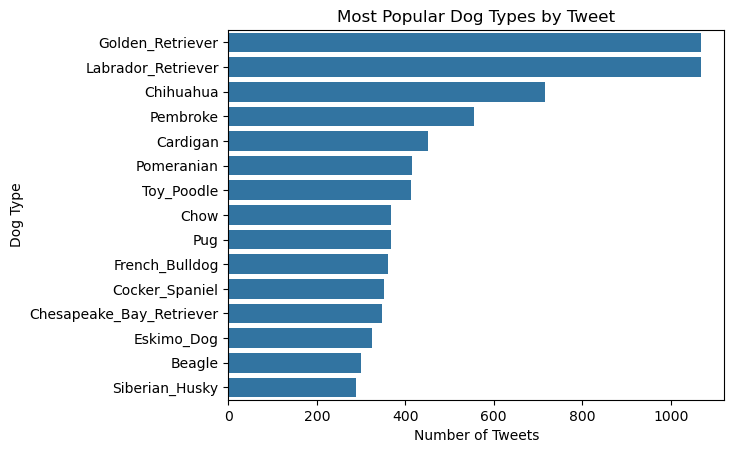

In [197]:
base_color = sns.color_palette()[0]
dog_order = twitter_archive_master['prediction'].value_counts().head(15)
sns.countplot(data=twitter_archive_master, y='prediction', color=base_color, order=dog_order.index)
plt.title('Most Popular Dog Types by Tweet')
plt.xlabel('Number of Tweets')
plt.ylabel('Dog Type');

### Visualization 1
- There is a right-upward trend between Retweets and Favorites tweet, meaning High numbers of Retweets and Favorite goes together


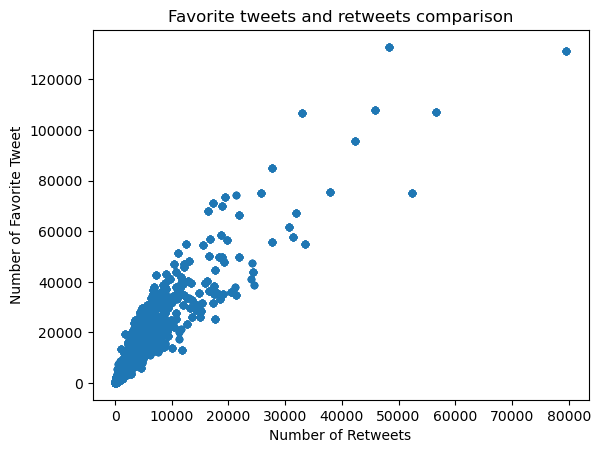

In [198]:
twitter_archive_master.plot.scatter(x = 'retweet_count', y = 'favorite_count')
plt.title('Favorite tweets and retweets comparison')
plt.xlabel('Number of Retweets')
plt.ylabel('Number of Favorite Tweet');

## Visualization 2

- From the line plot below, tweets emanating from WeRateDogs Twitter hand witness a gradual reduction

In [205]:
monthly_tweets_count = twitter_archive_master.groupby(twitter_archive_master['timestamp'].dt.to_period('M'))['tweet_id'].count()

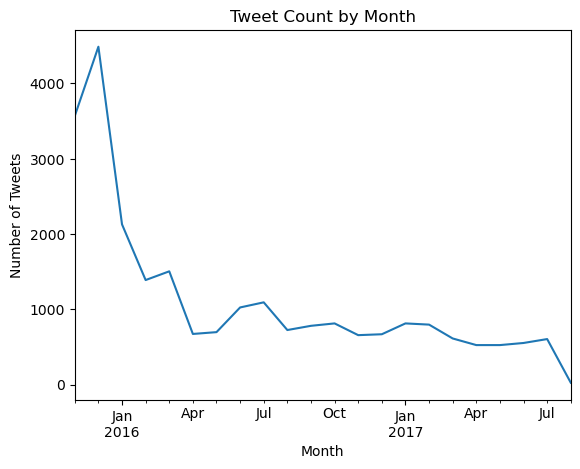

In [206]:
monthly_tweets_count.plot()
plt.title('Tweet Count by Month')
plt.xlabel('Month')
plt.ylabel('Number of Tweets');

## Visualization 3: 

- From the chart below, one can suggest that there is upward trend in the number of retweets by month. That is there is a gradual increase, though there are reduction in some cases, but on a larger scale there is an increase. 

- This means the WeRateDogs twitter account becomes increasingly popular.

In [207]:
twitter_archive_master['tweet_by_retweet'] = twitter_archive_master['retweet_count']

In [210]:
tweet_by_retweet = twitter_archive_master.groupby(twitter_archive_master['timestamp'].dt.to_period('M'))['retweet_count'].mean()

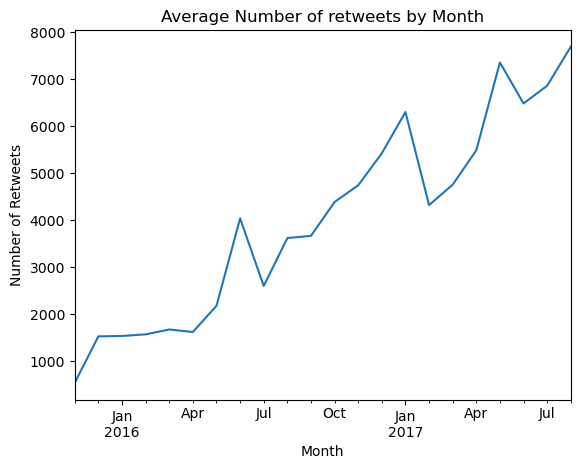

In [211]:
tweet_by_retweet.plot()
plt.title('Average Number of retweets by Month')
plt.xlabel('Month')
plt.ylabel('Number of Retweets');

In [ ]:
Visualization
Is there Correlation between ratings and favourite counts
Trends of tweets by month
Trends of retweets by month?
Trends of retweets by month?

## Visualization 4:¶

- Like Retweets, the favourited tweets by months also increase gradually, this alos means WeRateDogs becomes increasingly popular and got more engagements.

In [212]:
twitter_archive_master['favourited_tweet'] = twitter_archive_master['favorite_count']

In [213]:
favourited_tweet = twitter_archive_master.groupby(twitter_archive_master['timestamp'].dt.to_period('M'))['favorite_count'].mean()

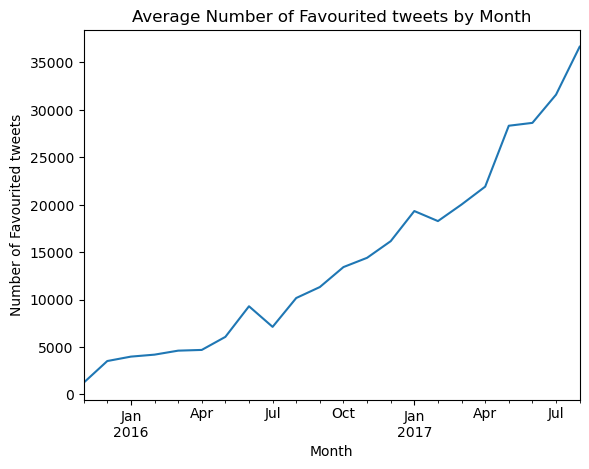

In [216]:
favourited_tweet.plot()
plt.title('Average Number of Favourited tweets by Month')
plt.xlabel('Month')
plt.ylabel('Number of Favourited tweets');